In [1]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandas

In [3]:
import pandas as pd

# Load the CSV file
file_path = '/Users/gabrielefabietti/projects/fetch_data/data/BTCUSDT_perpetual_futures_12_months_hourly.csv'  # Adjust this path accordingly
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print(data.head())

# Check if the data is in chronological order
is_chronological = data['timestamp'].is_monotonic_increasing
print(f"Is data in chronological order? {is_chronological}")

# If data is not in chronological order, sort it
if not is_chronological:
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.sort_values(by='timestamp').reset_index(drop=True)

    # Save the sorted data back to a CSV file
    sorted_file_path = '/Users/gabrielefabietti/projects/fetch_data/data/BTCUSDT_perpetual_futures_12_months_hourly_sorted.csv'
    data.to_csv(sorted_file_path, index=False)
    print(f"Sorted data saved to {sorted_file_path}")
else:
    print("Data is already in chronological order.")


             timestamp     open     high      low    close    volume  \
0  2023-05-26 13:00:00  26428.5  26587.0  26428.5  26529.9  6539.065   
1  2023-05-26 12:00:00  26455.2  26523.8  26341.3  26428.5  5815.110   
2  2023-05-26 11:00:00  26446.4  26496.3  26425.6  26455.2  1746.352   
3  2023-05-26 10:00:00  26436.0  26487.6  26417.8  26446.4  2016.122   
4  2023-05-26 09:00:00  26466.0  26466.1  26414.2  26436.0  1887.348   

       turnover  
0  1.734575e+08  
1  1.536183e+08  
2  4.619517e+07  
3  5.333502e+07  
4  4.989966e+07  
Is data in chronological order? False
Sorted data saved to /Users/gabrielefabietti/projects/fetch_data/data/BTCUSDT_perpetual_futures_12_months_hourly_sorted.csv


In [4]:
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load the CSV file with comma as the delimiter
file_path = '/Users/gabrielefabietti/projects/fetch_data/data/BTCUSDT_perpetual_futures_12_months_hourly_sorted.csv'
data = pd.read_csv(file_path, delimiter=',')

# Convert the timestamp to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Ensure the data is in the correct format for mplfinance
data = data[['open', 'high', 'low', 'close', 'volume']]

# Display the first few rows to inspect the data
print(data.head())
print(data.index)  # Check the index type to ensure it's a DatetimeIndex


                        open     high      low    close    volume
timestamp                                                        
2023-05-25 14:00:00  26324.1  26419.9  26267.5  26353.3  6256.710
2023-05-25 15:00:00  26353.3  26377.3  26147.9  26216.5  6220.939
2023-05-25 16:00:00  26216.5  26310.0  26200.2  26263.5  3636.470
2023-05-25 17:00:00  26263.5  26393.9  26244.8  26345.9  4675.360
2023-05-25 18:00:00  26345.9  26405.6  26323.1  26363.9  3468.026
DatetimeIndex(['2023-05-25 14:00:00', '2023-05-25 15:00:00',
               '2023-05-25 16:00:00', '2023-05-25 17:00:00',
               '2023-05-25 18:00:00', '2023-05-25 19:00:00',
               '2023-05-25 20:00:00', '2023-05-25 21:00:00',
               '2023-05-25 22:00:00', '2023-05-25 23:00:00',
               ...
               '2024-05-19 04:00:00', '2024-05-19 05:00:00',
               '2024-05-19 06:00:00', '2024-05-19 07:00:00',
               '2024-05-19 08:00:00', '2024-05-19 09:00:00',
               '2024-05-19 10:0

In [6]:
data

,open,high,low,close,volume
timestamp,,,,,
2023-05-25 14:00:00,26324.1,26419.9,26267.5,26353.3,6256.710
2023-05-25 15:00:00,26353.3,26377.3,26147.9,26216.5,6220.939
2023-05-25 16:00:00,26216.5,26310.0,26200.2,26263.5,3636.470
2023-05-25 17:00:00,26263.5,26393.9,26244.8,26345.9,4675.360
2023-05-25 18:00:00,26345.9,26405.6,26323.1,26363.9,3468.026
...,...,...,...,...,...
2024-05-19 09:00:00,67130.4,67180.2,66969.0,67158.6,1762.979
2024-05-19 10:00:00,67158.6,67737.7,67098.0,67247.7,8270.134
2024-05-19 11:00:00,67247.7,67367.3,66916.2,67299.9,5646.497


/opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


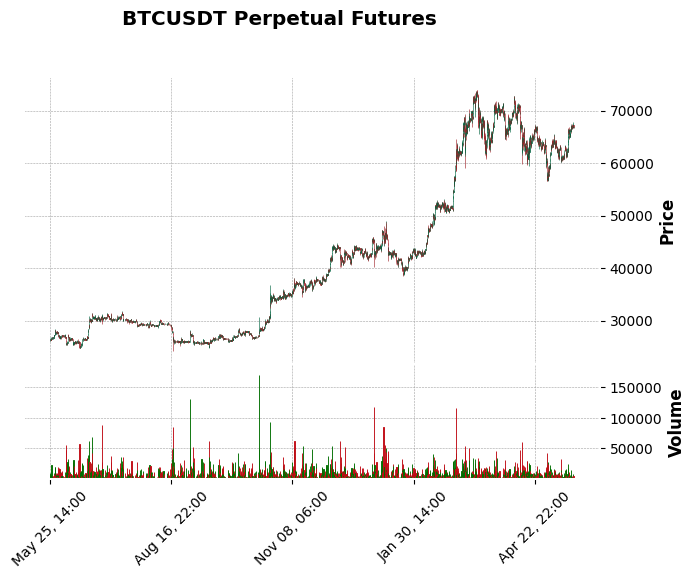

In [7]:
import mplfinance as mpf

# Plot the candlestick chart
mpf.plot(data, type='candle', style='charles', title='BTCUSDT Perpetual Futures', ylabel='Price', volume=True)


In [8]:
# Calculate the 24-period (24-hour) moving average of the volume
data['volume_MA_24'] = data['volume'].rolling(window=24).mean()
# Calculate the 100-period (100-hour) moving average of the closing prices
data['close_MA_100'] = data['close'].rolling(window=100).mean()

In [9]:
data

,open,high,low,close,volume,volume_MA_24,close_MA_100
timestamp,,,,,,,
2023-05-25 14:00:00,26324.1,26419.9,26267.5,26353.3,6256.710,NaN,NaN
2023-05-25 15:00:00,26353.3,26377.3,26147.9,26216.5,6220.939,NaN,NaN
2023-05-25 16:00:00,26216.5,26310.0,26200.2,26263.5,3636.470,NaN,NaN
2023-05-25 17:00:00,26263.5,26393.9,26244.8,26345.9,4675.360,NaN,NaN
2023-05-25 18:00:00,26345.9,26405.6,26323.1,26363.9,3468.026,NaN,NaN
...,...,...,...,...,...,...,...
2024-05-19 09:00:00,67130.4,67180.2,66969.0,67158.6,1762.979,1698.401000,66019.460
2024-05-19 10:00:00,67158.6,67737.7,67098.0,67247.7,8270.134,1914.006667,66072.537
2024-05-19 11:00:00,67247.7,67367.3,66916.2,67299.9,5646.497,2053.836708,66123.961


In [10]:
# Initialize a list to store setups
setups = []

da = 1

# Loop through the data to identify setups
for i in range(100, len(data) - da):  # Start from 100 to ensure enough data for the 100-period MA
    # Check if the 100-period MA is going up or down
    if data['close_MA_100'].iloc[i] > data['close_MA_100'].iloc[i-1]:
        trend = 'up'
    else:
        trend = 'down'
    
    # Check the volume condition
    if trend == 'up' and data['close'].iloc[i] < data['open'].iloc[i] and data['volume'].iloc[i] >= 2 * data['volume_MA_24'].iloc[i]:
        # Uptrend setup: down candle with volume >= 2 * 24-period MA volume
        price_diff_percentage = ((data['close'].iloc[i+da] - data['close'].iloc[i]) / data['close'].iloc[i]) * 100
        setups.append((data.index[i], 'up', price_diff_percentage))
    elif trend == 'down' and data['close'].iloc[i] > data['open'].iloc[i] and data['volume'].iloc[i] >= 2 * data['volume_MA_24'].iloc[i]:
        # Downtrend setup: up candle with volume >= 2 * 24-period MA volume
        price_diff_percentage = ((data['close'].iloc[i] - data['close'].iloc[i+da]) / data['close'].iloc[i]) * 100
        setups.append((data.index[i], 'down', price_diff_percentage))

# Convert setups to DataFrame
setups_df = pd.DataFrame(setups, columns=['Time', 'Setup', 'Price_Diff_Percentage'])


In [11]:
setups_df

,Time,Setup,Price_Diff_Percentage
0,2023-05-30 14:00:00,up,0.186878
1,2023-05-31 04:00:00,up,-0.604161
2,2023-05-31 05:00:00,up,0.285083
3,2023-05-31 14:00:00,up,-0.468801
4,2023-06-01 16:00:00,down,0.513530
...,...,...,...
366,2024-05-12 15:00:00,down,0.142189
367,2024-05-12 17:00:00,down,0.398134
368,2024-05-14 14:00:00,down,0.047913
369,2024-05-16 17:00:00,up,0.189897


In [12]:
# Initialize capital
initial_capital = 100000
capital = initial_capital

# Initialize a list to track capital over time
capital_over_time = [capital]

# Simulate the strategy
for i, row in setups_df.iterrows():
    # Calculate the change in capital based on the price difference percentage
    capital_change = capital * (row['Price_Diff_Percentage']/100)
    capital += capital_change
    capital_over_time.append(capital)

# Add the capital over time to the setups_df for tracking
setups_df['Capital_After_Trade'] = capital_over_time[1:]  # Skip the initial capital entry

# Display the first few rows of the updated DataFrame
print(setups_df.head())

# Print final capital
print(f"Final capital: {capital:.2f}")


                 Time Setup  Price_Diff_Percentage  Capital_After_Trade
0 2023-05-30 14:00:00    up               0.186878        100186.877979
1 2023-05-31 04:00:00    up              -0.604161         99581.588080
2 2023-05-31 05:00:00    up               0.285083         99865.478604
3 2023-05-31 14:00:00    up              -0.468801         99397.308365
4 2023-06-01 16:00:00  down               0.513530         99907.743836
Final capital: 102963.83


In [13]:
# Calculate the total number of setups
total_setups = len(setups_df)

# Calculate the number of up setups
num_up_setups = len(setups_df[setups_df['Setup'] == 'up'])

# Calculate the number of down setups
num_down_setups = len(setups_df[setups_df['Setup'] == 'down'])

# Calculate the percentages
percent_up_setups = (num_up_setups / total_setups) * 100
percent_down_setups = (num_down_setups / total_setups) * 100

print(f"Percentage of up setups: {percent_up_setups:.2f}%")
print(f"Percentage of down setups: {percent_down_setups:.2f}%")


Percentage of up setups: 61.19%
Percentage of down setups: 38.81%


In [14]:
# Calculate the number of positive price differences
num_positive_price_diffs = len(setups_df[setups_df['Price_Diff_Percentage'] > 0])

# Calculate the percentage of positive price differences
percent_positive_price_diffs = (num_positive_price_diffs / total_setups) * 100

print(f"Percentage of positive price differences: {percent_positive_price_diffs:.2f}%")


Percentage of positive price differences: 57.68%


In [15]:
# Calculate the mean of the price diff percentage
mean_price_diff_percentage = setups_df['Price_Diff_Percentage'].mean()

print(f"Mean of the Price Diff Percentage: {mean_price_diff_percentage:.2f}%")


Mean of the Price Diff Percentage: 0.01%


In [16]:
data

,open,high,low,close,volume,volume_MA_24,close_MA_100
timestamp,,,,,,,
2023-05-25 14:00:00,26324.1,26419.9,26267.5,26353.3,6256.710,NaN,NaN
2023-05-25 15:00:00,26353.3,26377.3,26147.9,26216.5,6220.939,NaN,NaN
2023-05-25 16:00:00,26216.5,26310.0,26200.2,26263.5,3636.470,NaN,NaN
2023-05-25 17:00:00,26263.5,26393.9,26244.8,26345.9,4675.360,NaN,NaN
2023-05-25 18:00:00,26345.9,26405.6,26323.1,26363.9,3468.026,NaN,NaN
...,...,...,...,...,...,...,...
2024-05-19 09:00:00,67130.4,67180.2,66969.0,67158.6,1762.979,1698.401000,66019.460
2024-05-19 10:00:00,67158.6,67737.7,67098.0,67247.7,8270.134,1914.006667,66072.537
2024-05-19 11:00:00,67247.7,67367.3,66916.2,67299.9,5646.497,2053.836708,66123.961


In [17]:
import numpy as np

data['direction'] = np.where(data['close'] > data['open'], 'up', 'down')

In [18]:
data

,open,high,low,close,volume,volume_MA_24,close_MA_100,direction
timestamp,,,,,,,,
2023-05-25 14:00:00,26324.1,26419.9,26267.5,26353.3,6256.710,NaN,NaN,up
2023-05-25 15:00:00,26353.3,26377.3,26147.9,26216.5,6220.939,NaN,NaN,down
2023-05-25 16:00:00,26216.5,26310.0,26200.2,26263.5,3636.470,NaN,NaN,up
2023-05-25 17:00:00,26263.5,26393.9,26244.8,26345.9,4675.360,NaN,NaN,up
2023-05-25 18:00:00,26345.9,26405.6,26323.1,26363.9,3468.026,NaN,NaN,up
...,...,...,...,...,...,...,...,...
2024-05-19 09:00:00,67130.4,67180.2,66969.0,67158.6,1762.979,1698.401000,66019.460,up
2024-05-19 10:00:00,67158.6,67737.7,67098.0,67247.7,8270.134,1914.006667,66072.537,up
2024-05-19 11:00:00,67247.7,67367.3,66916.2,67299.9,5646.497,2053.836708,66123.961,up


In [19]:
# Initialize a list to store setups
setups = []

da = 1

# Loop through the data to identify setups
for i in range(100, len(data) - da):  # Start from 100 to ensure enough data for the 100-period MA
    # Check if the 100-period MA is going up or down
    if data['close_MA_100'].iloc[i] > data['close_MA_100'].iloc[i-1]:
        trend = 'up'
    else:
        trend = 'down'
    
    # Check the volume condition
    if trend == 'up' and data['direction'].iloc[i] == 'down' and data['volume'].iloc[i] >= 2 * data['volume_MA_24'].iloc[i] and (data['volume'].iloc[i] > data['volume'].iloc[i-1]):
        # Uptrend setup: down candle with volume >= 2 * 24-period MA volume
        price_diff_percentage = ((data['close'].iloc[i+da] - data['close'].iloc[i]) / data['close'].iloc[i]) * 100
        setups.append((data.index[i], 'up', price_diff_percentage))
    elif trend == 'down' and data['direction'].iloc[i] == 'up' and data['volume'].iloc[i] >= 2 * data['volume_MA_24'].iloc[i] and (data['volume'].iloc[i] > data['volume'].iloc[i-1]):
        # Downtrend setup: up candle with volume >= 2 * 24-period MA volume
        price_diff_percentage = ((data['close'].iloc[i] - data['close'].iloc[i+da]) / data['close'].iloc[i]) * 100
        setups.append((data.index[i], 'down', price_diff_percentage))

# Convert setups to DataFrame
setups_df = pd.DataFrame(setups, columns=['Time', 'Setup', 'Diff_Percentage'])
setups_df

,Time,Setup,Diff_Percentage
0,2023-05-30 14:00:00,up,0.186878
1,2023-05-31 04:00:00,up,-0.604161
2,2023-05-31 05:00:00,up,0.285083
3,2023-05-31 14:00:00,up,-0.468801
4,2023-06-01 16:00:00,down,0.513530
...,...,...,...
284,2024-05-11 15:00:00,down,-0.040875
285,2024-05-12 10:00:00,down,0.049224
286,2024-05-12 15:00:00,down,0.142189
287,2024-05-14 14:00:00,down,0.047913


In [20]:
# Calculate the number of positive price differences
num_positive_price_diffs = len(setups_df[setups_df['Diff_Percentage'] > 0])

# Calculate the percentage of positive price differences
percent_positive_price_diffs = (num_positive_price_diffs / total_setups) * 100

print(f"Percentage of positive price differences: {percent_positive_price_diffs:.2f}%")


Percentage of positive price differences: 45.28%


In [21]:
# Calculate the mean of the price diff percentage
mean_price_diff_percentage = setups_df['Diff_Percentage'].mean()

print(f"Mean of the Price Diff Percentage: {mean_price_diff_percentage:.2f}%")

Mean of the Price Diff Percentage: 0.00%


In [22]:
# Create a column for the maximum values over the last 20 candles
data['max_last_20'] = data['high'].rolling(window=20).max()

# Create a column for the minimum values over the last 20 candles
data['min_last_20'] = data['low'].rolling(window=20).min()

# Display the first few rows to verify
print(data[['high', 'low', 'max_last_20', 'min_last_20']].head(25))


                        high      low  max_last_20  min_last_20
timestamp                                                      
2023-05-25 14:00:00  26419.9  26267.5          NaN          NaN
2023-05-25 15:00:00  26377.3  26147.9          NaN          NaN
2023-05-25 16:00:00  26310.0  26200.2          NaN          NaN
2023-05-25 17:00:00  26393.9  26244.8          NaN          NaN
2023-05-25 18:00:00  26405.6  26323.1          NaN          NaN
2023-05-25 19:00:00  26627.4  26356.4          NaN          NaN
2023-05-25 20:00:00  26503.6  26443.0          NaN          NaN
2023-05-25 21:00:00  26469.3  26422.8          NaN          NaN
2023-05-25 22:00:00  26464.5  26409.7          NaN          NaN
2023-05-25 23:00:00  26538.9  26438.4          NaN          NaN
2023-05-26 00:00:00  26495.0  26362.0          NaN          NaN
2023-05-26 01:00:00  26525.1  26330.0          NaN          NaN
2023-05-26 02:00:00  26426.8  26365.1          NaN          NaN
2023-05-26 03:00:00  26473.6  26375.8   

In [23]:
data

,open,high,low,close,volume,volume_MA_24,close_MA_100,direction,max_last_20,min_last_20
timestamp,,,,,,,,,,
2023-05-25 14:00:00,26324.1,26419.9,26267.5,26353.3,6256.710,NaN,NaN,up,NaN,NaN
2023-05-25 15:00:00,26353.3,26377.3,26147.9,26216.5,6220.939,NaN,NaN,down,NaN,NaN
2023-05-25 16:00:00,26216.5,26310.0,26200.2,26263.5,3636.470,NaN,NaN,up,NaN,NaN
2023-05-25 17:00:00,26263.5,26393.9,26244.8,26345.9,4675.360,NaN,NaN,up,NaN,NaN
2023-05-25 18:00:00,26345.9,26405.6,26323.1,26363.9,3468.026,NaN,NaN,up,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-05-19 09:00:00,67130.4,67180.2,66969.0,67158.6,1762.979,1698.401000,66019.460,up,67320.0,66469.0
2024-05-19 10:00:00,67158.6,67737.7,67098.0,67247.7,8270.134,1914.006667,66072.537,up,67737.7,66520.0
2024-05-19 11:00:00,67247.7,67367.3,66916.2,67299.9,5646.497,2053.836708,66123.961,up,67737.7,66667.7


In [33]:
# Initialize a list to store setups
setups = []

# Loop through the data to identify setups
for i in range(20, len(data) - 1):  # Start from 20 to ensure enough data for the 20-period max/min
    # Identify short setups
    if data['high'].iloc[i] > data['max_last_20'].iloc[i-1] and data['close'].iloc[i] < data['open'].iloc[i]:
        next_candle_diff = ((data['close'].iloc[i+1] - data['close'].iloc[i]) / data['close'].iloc[i]) * 100
        setups.append((data.index[i], 'short', next_candle_diff))
    
    # Identify long setups
    if data['low'].iloc[i] < data['min_last_20'].iloc[i-1] and data['close'].iloc[i] > data['open'].iloc[i]:
        next_candle_diff = ((data['close'].iloc[i+1] - data['close'].iloc[i]) / data['close'].iloc[i]) * 100
        setups.append((data.index[i], 'long', next_candle_diff))

# Convert setups to DataFrame
setups_df = pd.DataFrame(setups, columns=['Time', 'Setup', 'Next_Candle_Percentage_Diff'])

# Display the first few rows of the setups DataFrame
print(setups_df.head())


                 Time  Setup  Next_Candle_Percentage_Diff
0 2023-05-27 18:00:00  short                     0.096667
1 2023-05-28 04:00:00  short                    -0.012154
2 2023-05-28 11:00:00  short                    -0.048267
3 2023-05-28 23:00:00  short                     0.447417
4 2023-05-29 17:00:00   long                    -0.184549


In [34]:
setups_df

,Time,Setup,Next_Candle_Percentage_Diff
0,2023-05-27 18:00:00,short,0.096667
1,2023-05-28 04:00:00,short,-0.012154
2,2023-05-28 11:00:00,short,-0.048267
3,2023-05-28 23:00:00,short,0.447417
4,2023-05-29 17:00:00,long,-0.184549
...,...,...,...
335,2024-05-10 16:00:00,long,-1.103254
336,2024-05-12 16:00:00,short,0.452619
337,2024-05-16 00:00:00,short,-0.134154
338,2024-05-16 12:00:00,short,0.498408


In [35]:
tot_su = len(setups_df)

# Calculate the number of positive price differences
num_positive_price_diffs = len(setups_df[setups_df['Next_Candle_Percentage_Diff'] > 0])

# Calculate the percentage of positive price differences
percent_positive_price_diffs = (num_positive_price_diffs / tot_su) * 100

print(f"Percentage of positive price differences: {percent_positive_price_diffs:.2f}%")


Percentage of positive price differences: 50.59%


In [36]:
# Calculate the mean of the price diff percentage
mean_price_diff_percentage = setups_df['Next_Candle_Percentage_Diff'].mean()

print(f"Mean of the Price Diff Percentage: {mean_price_diff_percentage:.2f}%")

Mean of the Price Diff Percentage: -0.03%
